# A* and Dijkstra

The goal of this assignment is to familiarize myself with searching algorithms. In this case we will be using algorithms designed for finding short paths. 

1. Data Preprocessing
2. Methods
3. Results / Answers
4. Analysis

Author: Paul Mello
Prof: Jetcheva
Date: 9/20/21
Class: CMPE 252

## Section 1: Data Preprocessing

Below I download the appropriate libararies, load the proper data files, then check to see if the data was loaded properly. No cleanup is necessary given the cleanliness of the text files.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_xy.txt", skiprows = 6, delim_whitespace=True, names = ['X', 'Y'])
dist = np.loadtxt("https://people.sc.fsu.edu/~jburkardt/datasets/cities/sgb128_dist.txt", skiprows = 6)

In [3]:
df = df.iloc[1:] #Remove First line containing no information
df

,X,Y
1,-5572.57,2839.81
2,-6729.21,2962.82
3,-8326.72,3219.84
4,-4961.07,2920.67
5,-6202.70,3014.64
...,...,...
124,-8278.33,2730.66
125,-7230.86,3483.78
126,-8446.23,2776.26
127,-5246.43,2786.63


In [4]:
print(dist)

[[   0.  966. 1513. ... 1564. 2871.  348.]
 [ 966.    0. 2410. ...  198. 1917. 2541.]
 [1513. 2410.    0. ... 2217. 2673. 1570.]
 ...
 [1564.  198. 2217. ...    0.  321.  936.]
 [2871. 1917. 2673. ...  321.    0.   34.]
 [ 348. 2541. 1570. ...  936.   34.    0.]]


## Section 2: Methods

In the following code I develop my graph, then unload the text files into the graph itself. 

Note that the euclidean distance from the x and y file is calculated using eucdist. If the euclidean distance is less than the 230, then the actual road distance is used as the weight for the edge connecting the two nodes.

In [5]:
G = nx.Graph()

In [6]:
%%capture 
# "%%capture": Capture Future Warning of Depreciation

x = []
y = []
i = 0
Nodes = pd.DataFrame({'City' : [], 'Latitude' : [], 'Longitude' : []})
Edges = pd.DataFrame({'CityStart' : [], 'CityEnd' : [],'Distance' : []})
while ((127 - i) > 0):
    k = 0
    xvar = pd.to_numeric(df.loc[i+1,'X'])
    x.append(xvar)
    yvar = pd.to_numeric(df.loc[i+1,'Y'])
    y.append(yvar)
    cityStart = "City %i"%i
    Nodes.loc[len(Nodes.index)] = [cityStart, xvar, yvar]
    while ((127 - k) > 0):
        Zxvar = pd.to_numeric(df.loc[k+1,'X'])
        Zyvar = pd.to_numeric(df.loc[k+1,'Y'])
        Dvar = pd.to_numeric(dist[i][k])
        eucdist = ((xvar - Zxvar)**2 + (yvar - Zyvar)**2)**0.5
        k = k + 1
        if(eucdist <= 230):
            G.add_edge((xvar, yvar), (Zxvar, Zyvar), weight=Dvar)
            t = k - 1
            cityEnd = "City %i"%t
            if cityStart != cityEnd:
                Edges = Edges.append({'CityStart' : cityStart, 'CityEnd' : cityEnd,'Distance' : eucdist}, ignore_index=True)
    i = i + 1

In [7]:
G.number_of_nodes()

127

## Section 3: A* Results

Below the results from the graph are displayed using matplotlib. We can see that the graph appears to be a depiction of the united states. We have been instructed to use nodes 6 and 16 as our start and end. 

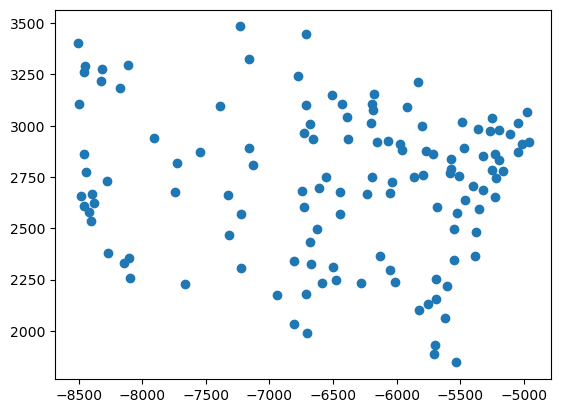

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
def euc(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return (((x1 - x2) ** 2 + (y1 - y2) ** 2) ** .5)

In [10]:
#Question 1 Answer

#Below I display the nodes I traversed using the astar path algorithm. The shortest path I traversed was a total of 19 nodes

In [11]:
start = (-6712.64, 3446.49)
end = (-5531.11, 1846.22)
nx.astar_path(G, start, end, euc)

[(-6712.64, 3446.49),
 (-6772.07, 3241.95),
 (-6709.88, 3102.4),
 (-6660.11, 2935.87),
 (-6553.01, 2747.93),
 (-6441.79, 2674.67),
 (-6231.74, 2668.46),
 (-6039.65, 2727.21),
 (-5975.39, 2908.91),
 (-5772.25, 2877.83),
 (-5570.49, 2788.7),
 (-5523.51, 2575.2),
 (-5351.44, 2593.85),
 (-5375.64, 2483.28),
 (-5551.82, 2343.71),
 (-5689.32, 2252.5),
 (-5754.27, 2130.2),
 (-5696.92, 1931.22),
 (-5531.11, 1846.22)]

In [12]:
len(nx.astar_path(G, start, end, euc)) #Checking length of final node path to show length of node traversal

19

## Section 3.1: Heuristic Results

With the above code working it is now time to test other potential weights.

(.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10) Respectively

In [13]:
testWeightList = [.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
def test_weights(num):
    def euc(a, b):
        (x1, y1) = a
        (x2, y2) = b
        return (((x1 - x2) ** 2 + (y1 - y2) ** 2) ** .5) * num
    start_time = time.time()
    print(f"Weight: {num} \tPath Length: {len(nx.astar_path(G, start, end, euc))} \tSeconds: {(time.time() - start_time):06f}")

In [15]:
for i in testWeightList:
    test_weights(i)

Weight: 0.5 	Path Length: 19 	Seconds: 0.001993
Weight: 1 	Path Length: 19 	Seconds: 0.001999
Weight: 2 	Path Length: 19 	Seconds: 0.002001
Weight: 3 	Path Length: 19 	Seconds: 0.001999
Weight: 4 	Path Length: 19 	Seconds: 0.001500
Weight: 5 	Path Length: 19 	Seconds: 0.001000
Weight: 6 	Path Length: 19 	Seconds: 0.001501
Weight: 7 	Path Length: 19 	Seconds: 0.000500
Weight: 8 	Path Length: 17 	Seconds: 0.001001
Weight: 9 	Path Length: 17 	Seconds: 0.000500
Weight: 10 	Path Length: 17 	Seconds: 0.000500


As we can see above, the euclidean distance is given an additional weight heuristic the time and node traversal decreases rapidly until we hit 10 which has the lowest time and time complexity. Although the data does not directly display 10 as the smallest, after multiple run throughs 10 is, on average, the fastest heuristic function. Assuming we would continue to change these weights I would assume to see consistantly better time and node traversal. 

Interestingly we can see a clear indication that the time each cell takes to run has a sort of plateu at certain numbers. Additionally, its slight variance such as in cell 21 has an increase of time, but I believe this anomally to be a result of cpu timings.

## Section 3.3: Dijkstra Results

Below we will compute the length of the shortest path between the source and destination nodes using the single_source_dijkstra() function from the networkx library.

In [16]:
start_time = time.time()
print(nx.single_source_dijkstra(G, start, end))
print('\n')
print(len(nx.single_source_dijkstra(G, start, end)))
print("%s seconds:" % (time.time() - start_time))

(11588.0, [(-6712.64, 3446.49), (-6772.07, 3241.95), (-6709.88, 3102.4), (-6660.11, 2935.87), (-6553.01, 2747.93), (-6441.79, 2674.67), (-6231.74, 2668.46), (-6039.65, 2727.21), (-5975.39, 2908.91), (-5772.25, 2877.83), (-5570.49, 2788.7), (-5523.51, 2575.2), (-5351.44, 2593.85), (-5375.64, 2483.28), (-5551.82, 2343.71), (-5689.32, 2252.5), (-5754.27, 2130.2), (-5696.92, 1931.22), (-5531.11, 1846.22)])


2
0.003500223159790039 seconds:


As we can see above the node traversal using dijkstra's algorithm gives us a bad time complexity and a suboptimal node traversal (19 nodes). This makes sense considering this is a greedy algorithm while A* is not. However, the length given is 2 which is odd and I can't seem to understand why. My best guess is the shortest distance is always a straight line.

## Section 4 Analysis

As a final note, I attempted to answer the optional question and my findings were that the weight value for the most optimal heuristic function is 10. 
Aside from that, it was very interesting to see A* complete a graph traversal as I have heard about it many times but never played with it until now. 

In [17]:
dfNode = pd.DataFrame(Nodes)
dfNode.to_csv(r'E:\School\San Jose\Fall 2021\CMPE 252\Knowledge Base\Nodes.csv')

dfEdge = pd.DataFrame(Edges)
dfEdge.to_csv(r'E:\School\San Jose\Fall 2021\CMPE 252\Knowledge Base\Edges.csv')

In [18]:
nx.write_graphml(G, 'graph.graphml')